In [1]:
import featurization
import helpers

import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%load_ext autoreload
%autoreload 2

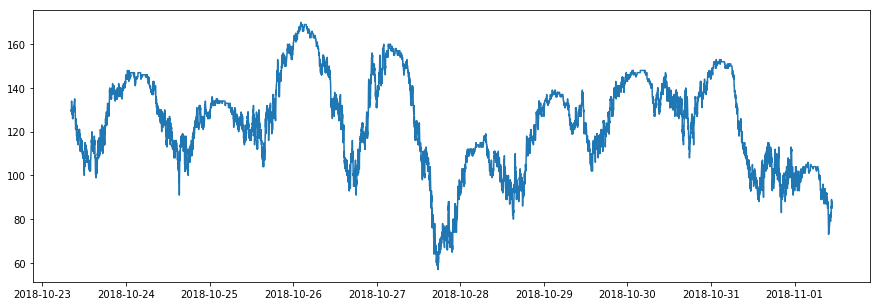

In [17]:
df = featurization.import_and_clean_data("all-sc-bike-data-1101.csv")
df['local_time'] = df['utc_time'].dt.tz_convert('America/Los_Angeles')
at_a_time = df.groupby(by='local_time')
at_a_time = at_a_time.bike_id.count().reset_index()
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(at_a_time['local_time'], at_a_time['bike_id'])
plt.show()

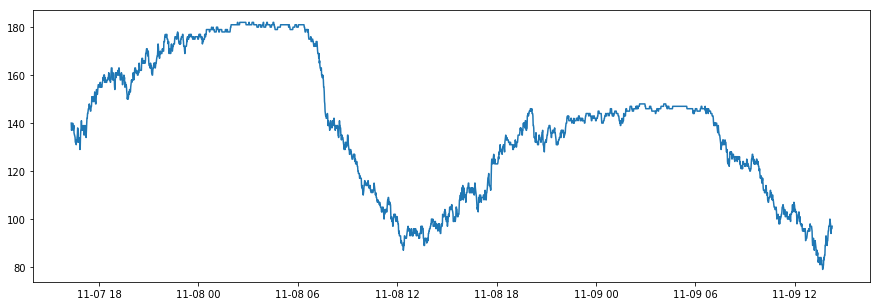

In [7]:
df = featurization.import_and_clean_data("bike-data/sc-bike-data-ending1109.csv")
df['local_time'] = df['utc_time'].dt.tz_convert('America/Los_Angeles')
at_a_time = df.groupby(by='local_time')
at_a_time = at_a_time.bike_id.count().reset_index()
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(at_a_time['local_time'], at_a_time['bike_id'])
plt.show()

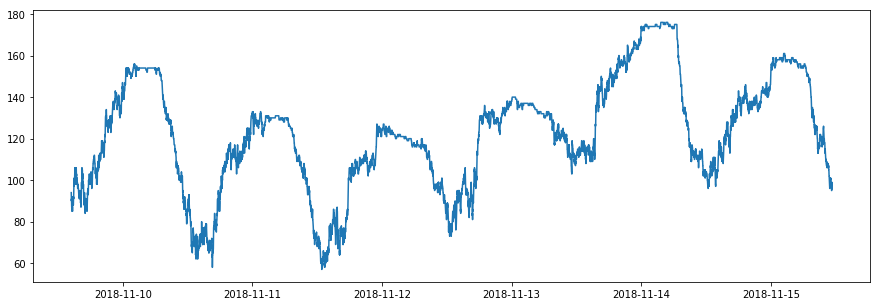

In [5]:
df = featurization.import_and_clean_data("bike-data/sc-bike-data-ending1115_clean.csv")
df['local_time'] = df['utc_time'].dt.tz_convert('America/Los_Angeles')
at_a_time = df.groupby(by='local_time')
at_a_time = at_a_time.bike_id.count().reset_index()
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(at_a_time['local_time'], at_a_time['bike_id'])
plt.show()

In [2]:
geodf = featurization.all_featurization("all-sc-bike-data-1101.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Dropping 1 entries where end time was before start time


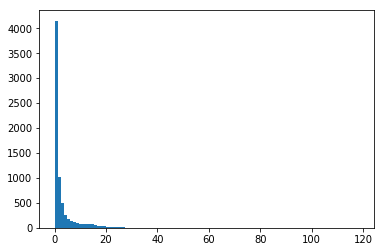

In [3]:
plt.hist(geodf.idle_hours, bins=100)
plt.show()

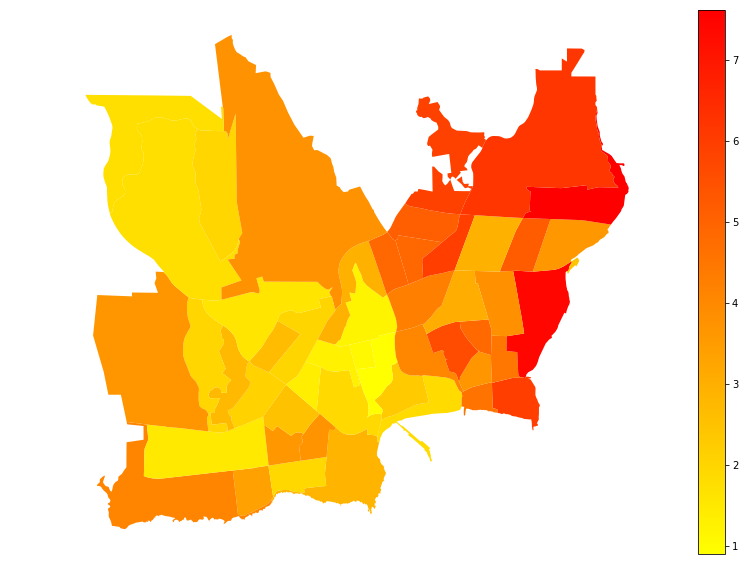

In [34]:
blockgrouped = geodf.groupby(by='GEOID_Data', axis=0)
bg_mean_idles = blockgrouped.idle_hours.mean()
bg_mean_idles = bg_mean_idles.reset_index()
bg_mean_idles = bg_mean_idles[bg_mean_idles.idle_hours <12]
bg_mean_idles = helpers.add_blockgroup_geometry(bg_mean_idles)

fig, ax = plt.subplots(1, figsize=(15, 10))
bg_mean_idles.plot(ax = ax, column='idle_hours', legend = True, cmap='autumn_r')
ax.axis('off')
plt.show()

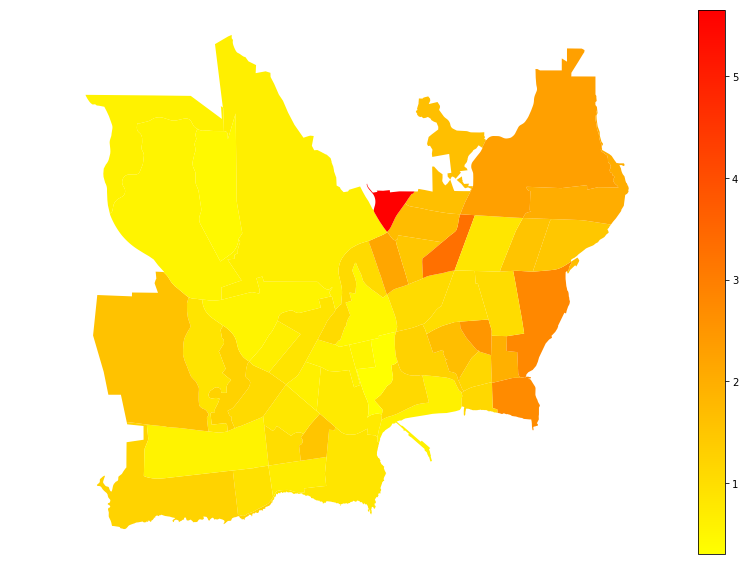

In [4]:
blockgrouped = geodf.groupby(by='GEOID_Data', axis=0)
bg_med_idles = blockgrouped.idle_hours.median()
bg_med_idles = bg_med_idles.reset_index()
bg_med_idles = helpers.add_blockgroup_geometry(bg_med_idles)

fig, ax = plt.subplots(1, figsize=(15, 10))
bg_med_idles.plot(ax = ax, column='idle_hours', legend = True, cmap='autumn_r')
ax.axis('off')
plt.show()

In [36]:
blockgrouped.pop_density.mean()

GEOID_Data
15000US060871001001    4.395997e+05
15000US060871001002    2.870736e+06
15000US060871002001    6.194423e+05
15000US060871002002    7.866922e+05
15000US060871002003    1.543514e+06
15000US060871002004    1.190503e+06
15000US060871002005    1.251364e+06
15000US060871002006    3.680806e+06
15000US060871002007    8.387518e+05
15000US060871003001    3.369729e+05
15000US060871003002    1.824951e+06
15000US060871004001    1.615471e+06
15000US060871004002    2.700568e+06
15000US060871004003    7.756200e+06
15000US060871005001    1.616846e+06
15000US060871005002    1.760779e+06
15000US060871005003    2.775377e+05
15000US060871006001    2.925184e+06
15000US060871006002    3.173231e+06
15000US060871006003    2.802774e+06
15000US060871007001    1.588185e+06
15000US060871007002    1.557911e+06
15000US060871008001    1.709112e+06
15000US060871008002    1.860798e+06
15000US060871008003    9.228717e+05
15000US060871008004    1.510556e+06
15000US060871008005    1.794198e+06
15000US0608710080

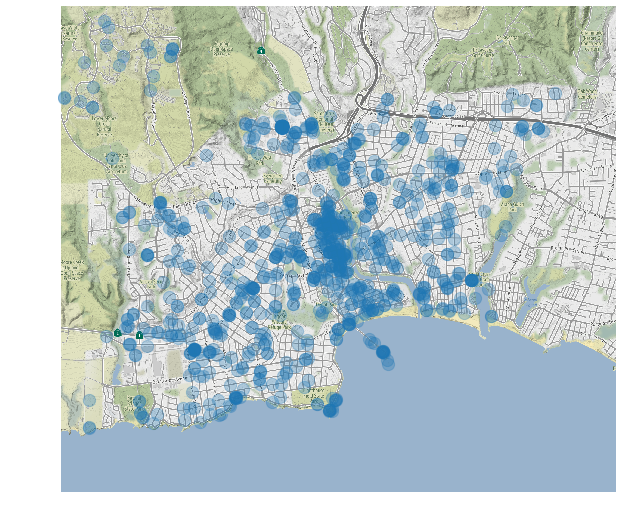

In [5]:
just_charged = geodf[geodf['just_got_charged']]
fig, ax = plt.subplots(1,1, figsize=(10,10))
helpers.map_bikes(ax, just_charged, alpha=0.3, markersize=150)

In [39]:
geodf_one = geodf[pd.to_datetime(geodf.local_time_start.dt.date) == '2018-10-29']

In [44]:
timeofday_start = geodf_one.groupby(by=['GEOID_Data', 'time_of_day_start'], axis=0)
timeofday_end = geodf_one.groupby(by=['GEOID_Data', 'time_of_day_end'], axis=0)

stod = timeofday_start.bike_id.count().unstack(fill_value=0).stack().reset_index(name='count')
etod = timeofday_end.bike_id.count().unstack(fill_value=0).stack().reset_index(name='count')

stod['net_flow'] = stod['count']-etod['count']
stod.rename(mapper = {'count':'arrivals'}, axis=1, inplace=True)
stod['departures'] = etod['count']

btod = helpers.add_blockgroup_geometry(stod)


In [49]:
btod = btod.fillna(0)

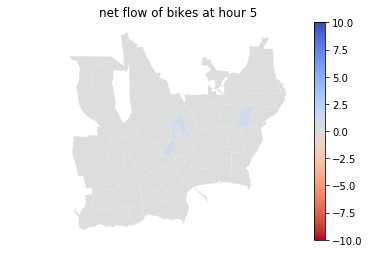

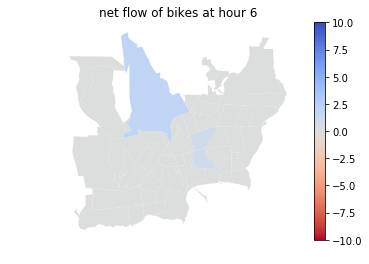

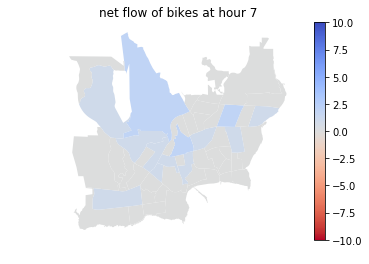

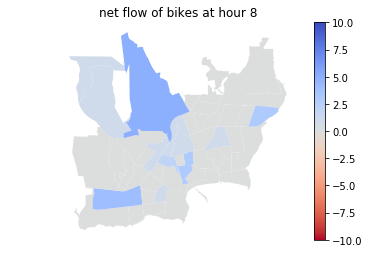

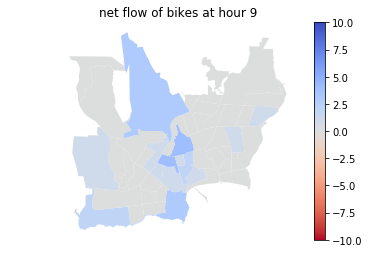

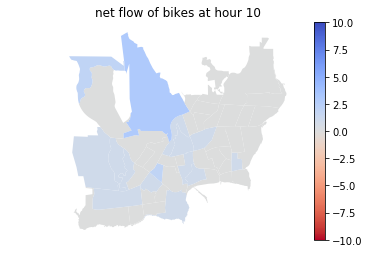

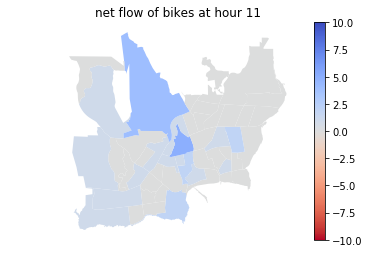

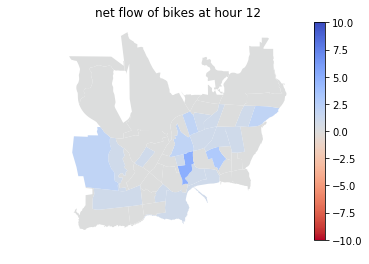

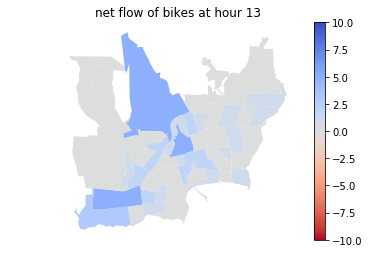

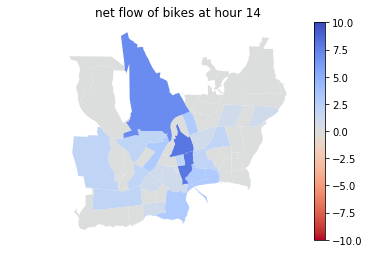

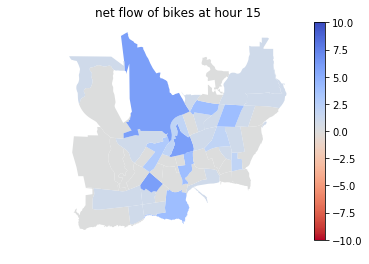

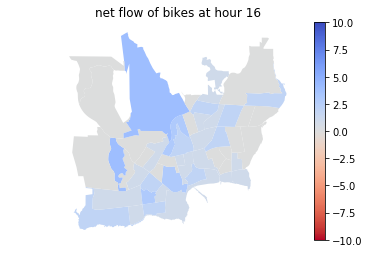

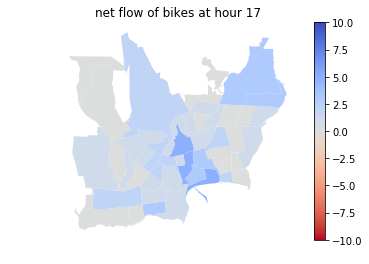

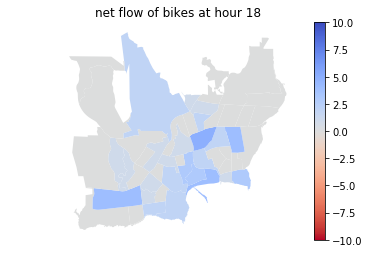

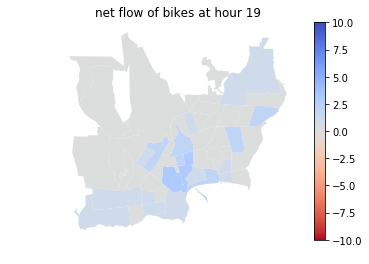

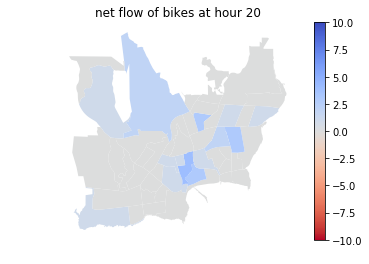

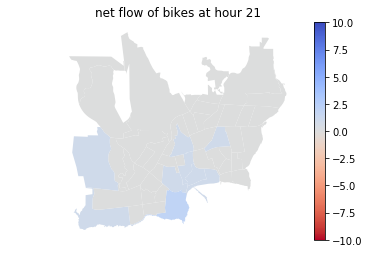

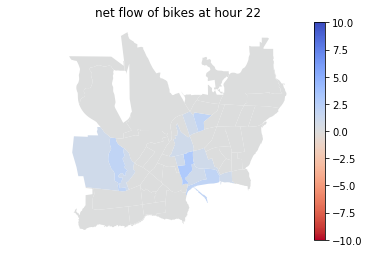

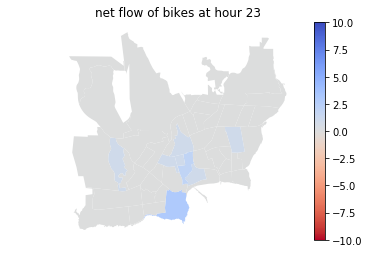

In [52]:
#arrivals
for hour in range(5,24):
    hourly_flow = btod[btod.time_of_day_start == hour]
    hourly_flow.plot(column='arrivals', legend = True, cmap='coolwarm_r', vmin=-10, vmax=10)
    plt.title('net flow of bikes at hour {}'.format(hour))
    plt.axis('off')

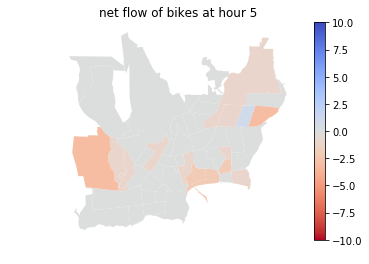

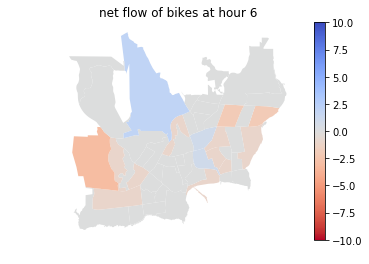

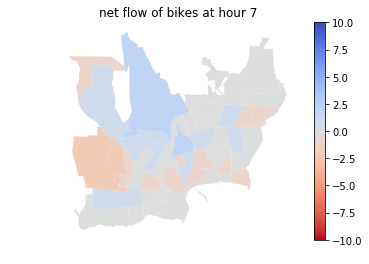

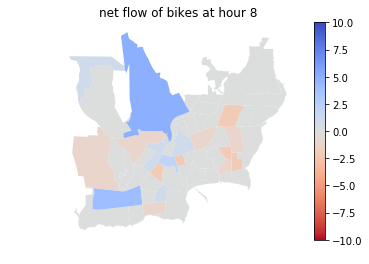

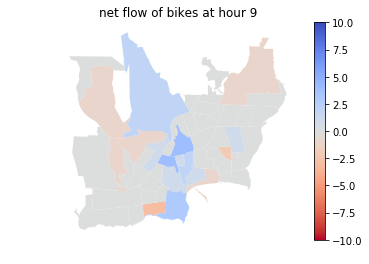

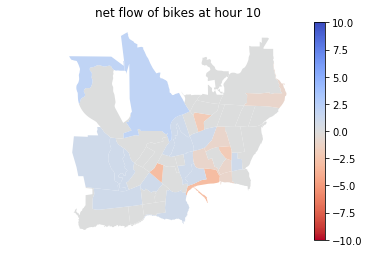

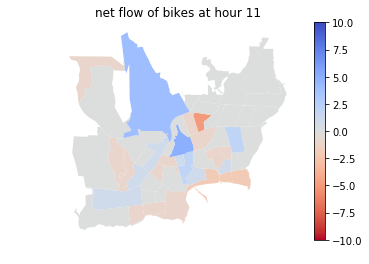

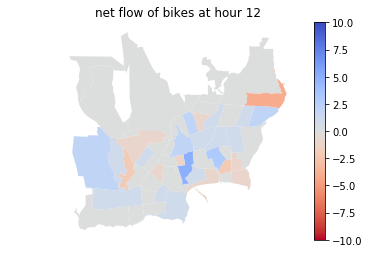

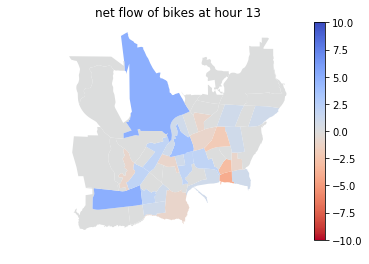

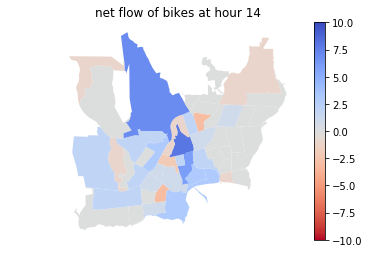

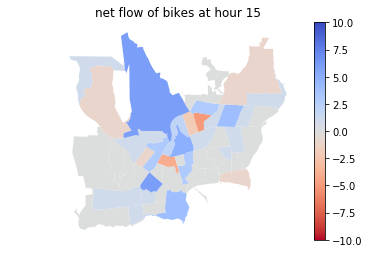

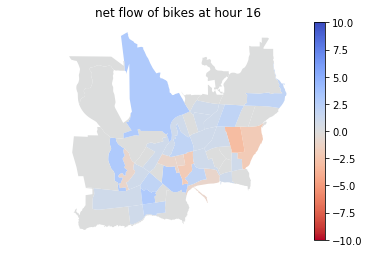

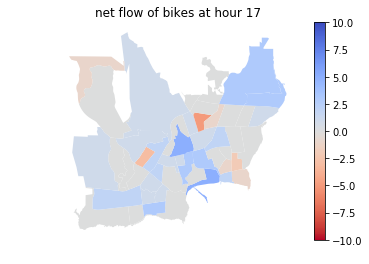

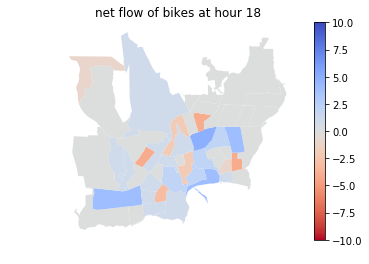

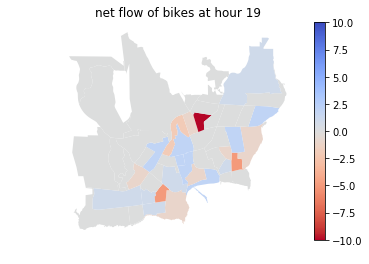

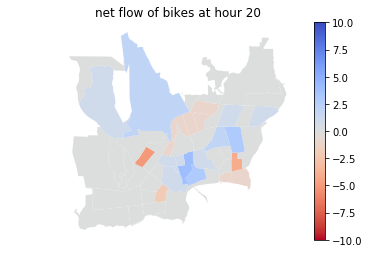

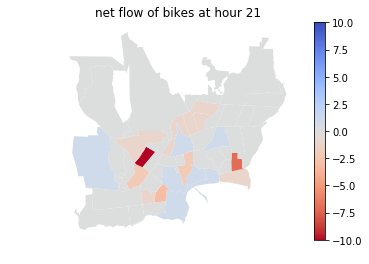

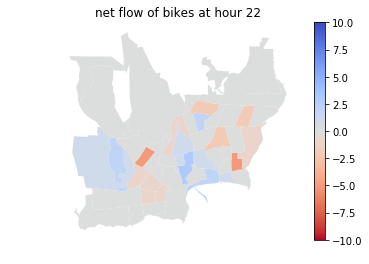

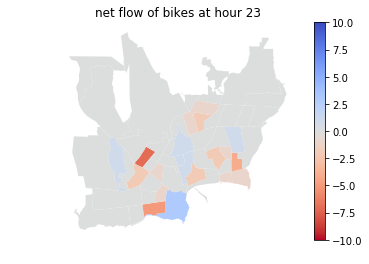

In [54]:
for hour in range(5,24):
    hourly_flow = btod[btod.time_of_day_start == hour]
    hourly_flow.plot(column='net_flow', legend = True, cmap='coolwarm_r', vmin=-10, vmax=10)
    plt.title('net flow of bikes at hour {}'.format(hour))
    plt.axis('off')
    plt.savefig('img_flow_hr_{}'.format(hour))

In [ ]:
plt.subplots()

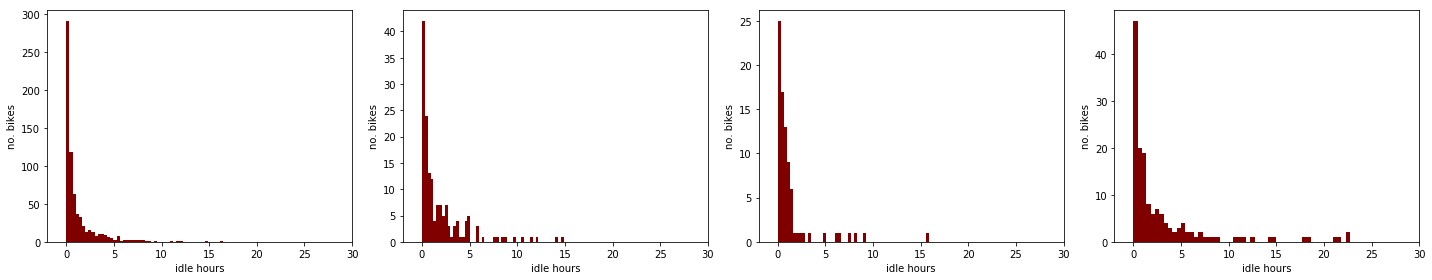

In [28]:
blockgroups = geodf.GEOID_Data.unique()
bg = blockgroups[[1, 4, 7, 11]]

fig, axes = plt.subplots(1, 4, figsize = (20,4), sharex=True)
for bg, a in zip(bg, axes.reshape(-1)):
    a.hist(geodf[geodf.GEOID_Data == bg].idle_hours, bins=50, color='maroon')
    a.set(xlabel="idle hours", ylabel="no. bikes")
plt.xlim(-2,30)
plt.tight_layout()
plt.show()

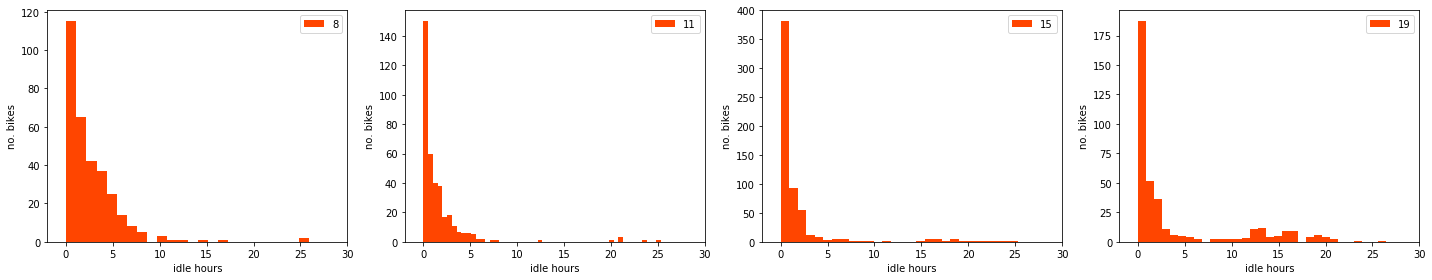

In [30]:
hours = [8, 11, 15, 19]

fig, axes = plt.subplots(1, 4, figsize = (20,4), sharex=True)
for h, a in zip(hours, axes.reshape(-1)):
    a.hist(geodf[geodf.time_of_day_start == h].idle_hours, bins=50, color='orangered', label=h)
    a.legend()
    a.set(xlabel="idle hours", ylabel="no. bikes")
plt.xlim(-2,30)
plt.tight_layout()
plt.show()

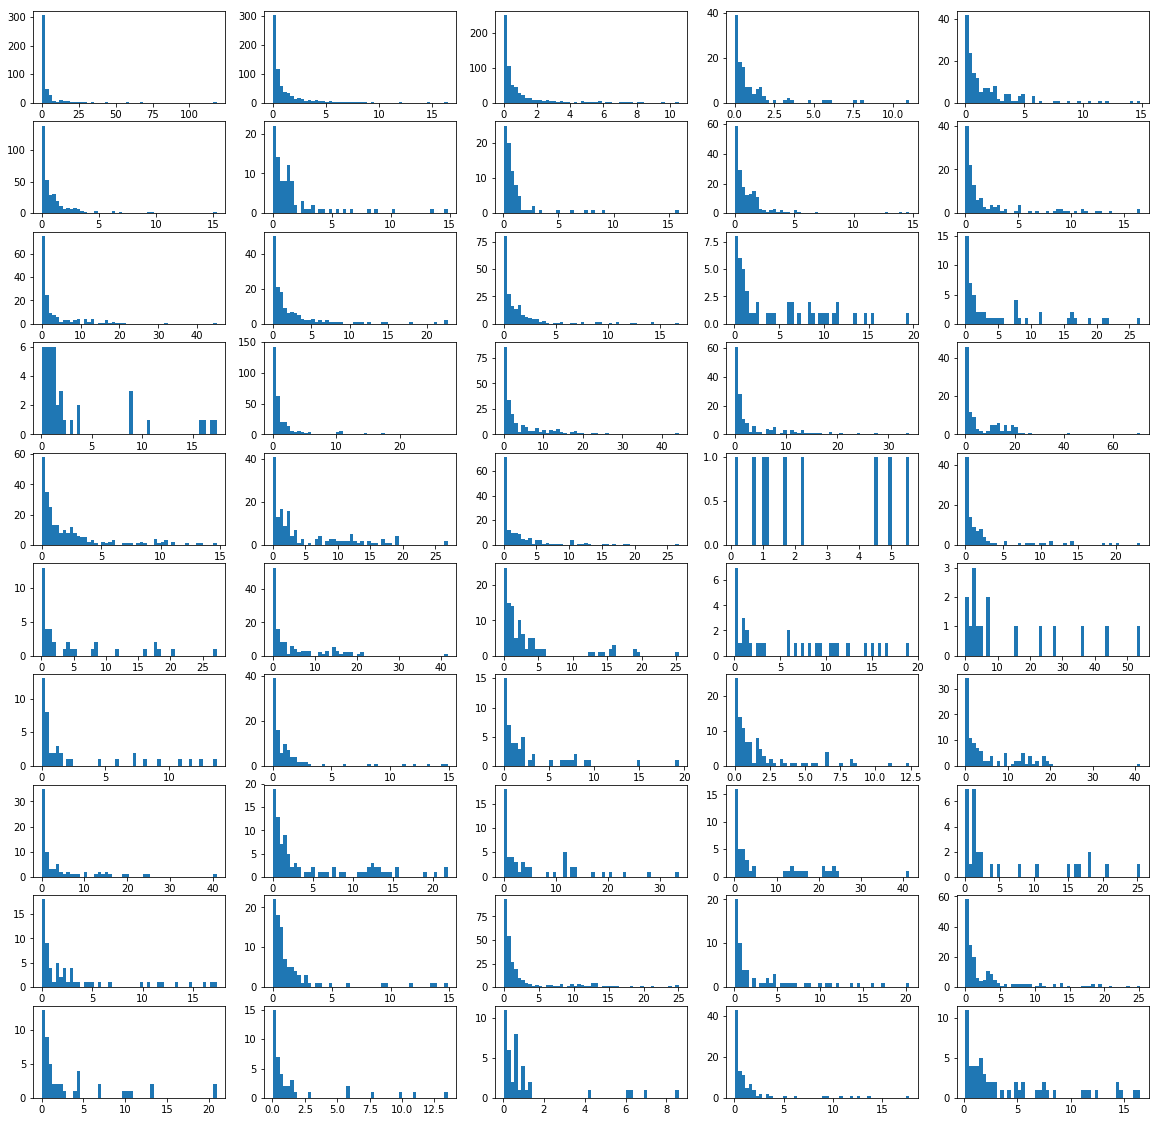

In [39]:
blockgroups = geodf.GEOID_Data.unique()

fig, axes = plt.subplots(10, 5, figsize = (20,20))
for bg, a in zip(blockgroups, axes.reshape(-1)):
    a.hist(geodf[geodf.GEOID_Data == bg].idle_hours, bins=50)

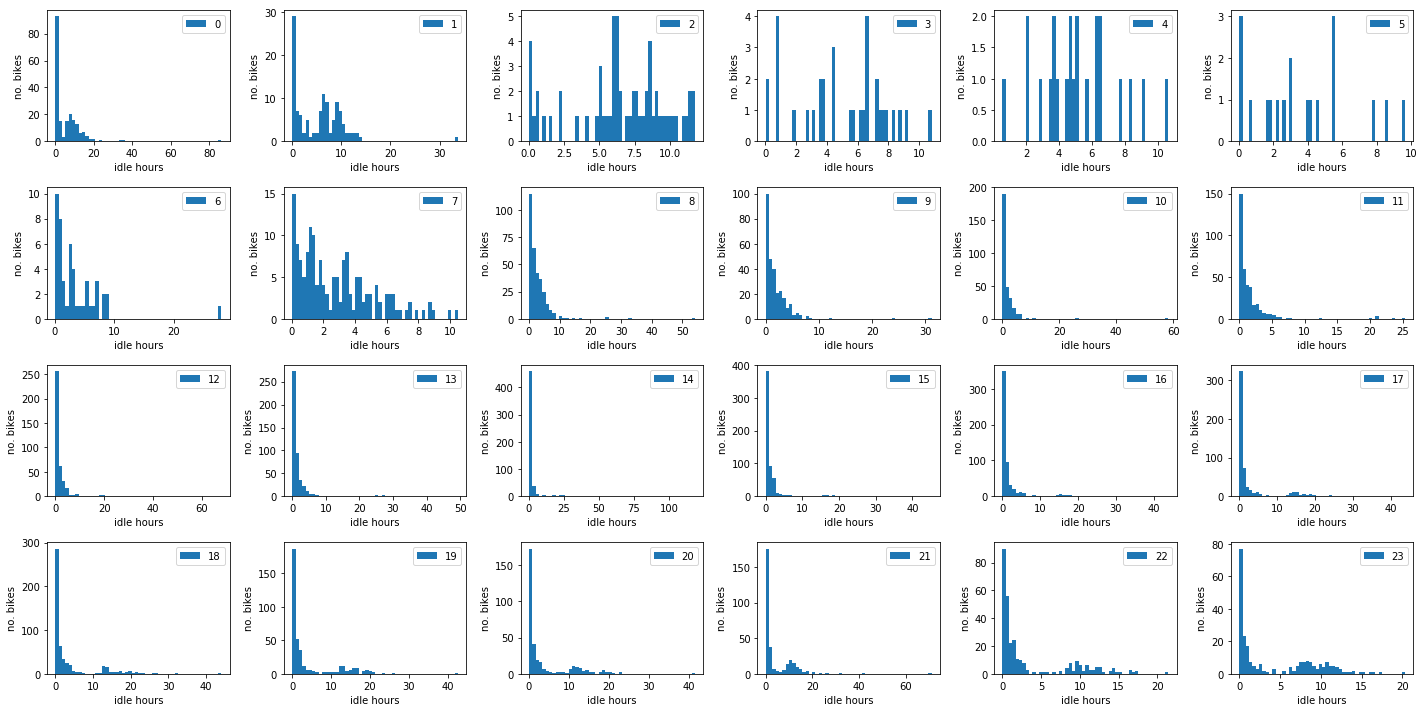

In [29]:
hours = sorted(geodf.time_of_day_start.unique())

fig, axes = plt.subplots(4, 6, figsize = (20,10))
for h, a in zip(hours, axes.reshape(-1)):
    a.hist(geodf[geodf.time_of_day_start == h].idle_hours, bins=50, label=h)
    a.legend()
    a.set(xlabel="idle hours", ylabel="no. bikes")
plt.tight_layout()
plt.show()

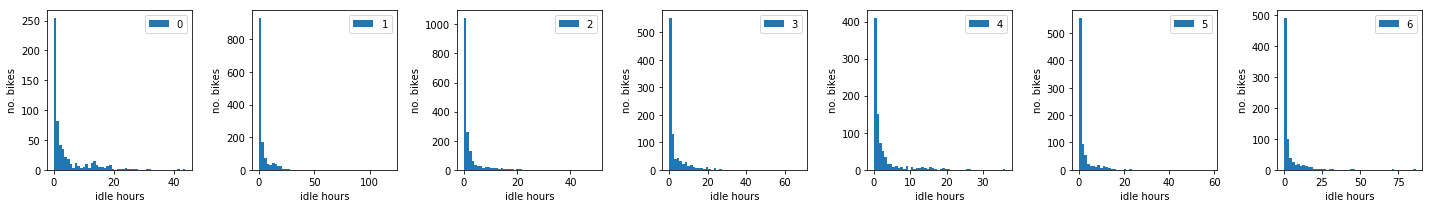

In [33]:
days = sorted(geodf.day_of_week.unique())

fig, axes = plt.subplots(1, 7, figsize = (20,3))
for d, a in zip(days, axes.reshape(-1)):
    a.hist(geodf[geodf.day_of_week == d].idle_hours, bins=50, label=d)
    a.legend()
    a.set(xlabel="idle hours", ylabel="no. bikes")
plt.tight_layout()
plt.show()

In [45]:
grouped = geodf.groupby(by=['GEOID_Data', 'time_of_day_start'], axis=0)
counts = grouped['bike_id'].count().reset_index()
counts = counts.pivot(index='GEOID_Data', columns='time_of_day_start', values='bike_id')

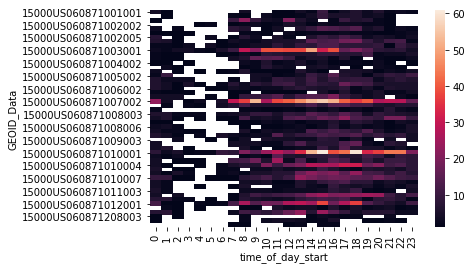

In [46]:
sns.heatmap(counts, )

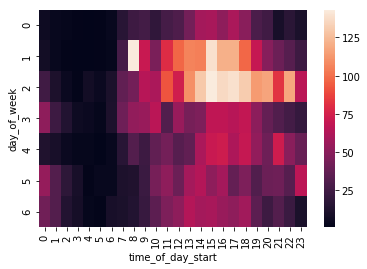

In [48]:
grouped = geodf.groupby(by=['day_of_week', 'time_of_day_start'], axis=0)
counts = grouped['bike_id'].count().reset_index()
counts = counts.pivot(index='day_of_week', columns='time_of_day_start', values='bike_id')
sns.heatmap(counts)